<a href="https://colab.research.google.com/github/eric157/Stats-Labs/blob/main/Probability_Theory_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability Theory: Assignment-2**


*   Eric Thomas
(202418057)




In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.special import comb

# **Q1**

**Consider the random experiment: Tossing of two coins independently with probability of heads 0.3 and 0.8, respectively. Find the probability of the following events by**

*   (a) Simulating the random experiment 10000 times and
*   (b) using theory of probability with proper assumptions.
1.   Heads in the first toss and
2.   At least one heads.



**Simulation Approach**

In [2]:
def simulate_coin_tosses(num_trials):
  heads_first_toss = 0
  at_least_one_head = 0
  for _ in range(num_trials):
    coin1_result = random.random() < 0.3
    coin2_result = random.random() < 0.8

    if coin1_result:
      heads_first_toss += 1
    if coin1_result or coin2_result:
      at_least_one_head += 1
  return heads_first_toss, at_least_one_head
num_trials = 10000
heads_first_toss, at_least_one_head = simulate_coin_tosses(num_trials)
print("Simulation Results:")
print("Probability of heads in the first toss (simulation):", heads_first_toss / num_trials)
print("Probability of at least one head (simulation):", at_least_one_head / num_trials)

Simulation Results:
Probability of heads in the first toss (simulation): 0.3066
Probability of at least one head (simulation): 0.8626


The function simulates two biased coin tosses over multiple trials, counting the occurrences of heads in the first toss and when at least one of the two coins shows heads. It then estimates the probabilities based on these frequencies.

**Theoretical Approach**

In [3]:
prob_heads_first_toss = 0.3
prob_at_least_one_head = 1 - ((1 - 0.3) * (1 - 0.8))
print("Theoretical Results:")
print("Probability of heads in the first toss (theoretical):", prob_heads_first_toss)
print("Probability of at least one head (theoretical):", prob_at_least_one_head)

Theoretical Results:
Probability of heads in the first toss (theoretical): 0.3
Probability of at least one head (theoretical): 0.8600000000000001


The theoretical probability of obtaining heads in the first toss is 0.3, while the probability of getting at least one head in two independent tosses is approximately 0.86.

**Proving Statistical Singularity with the help of plt**

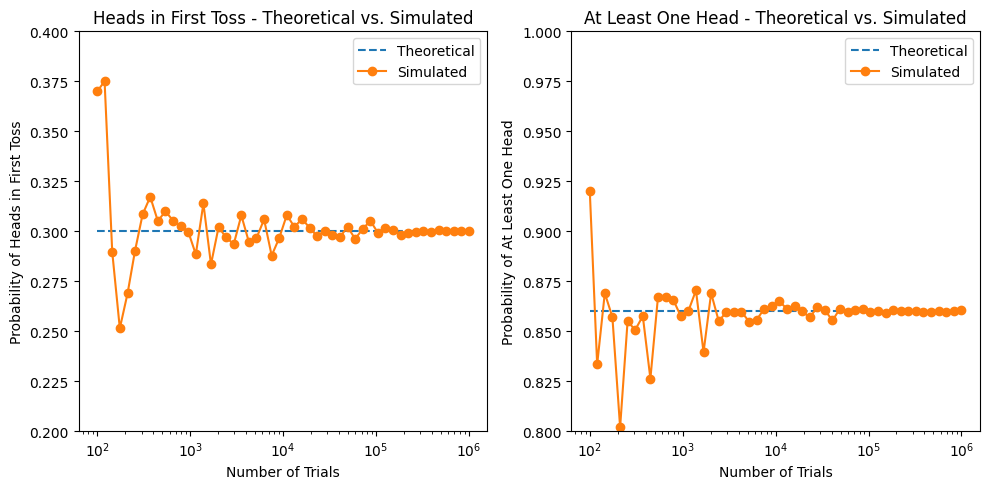

In [4]:
num_trials_list = np.logspace(2, 6, num=50, dtype=int)
simulated_heads_first_toss_probs = []
simulated_at_least_one_head_probs = []

for num_trials in num_trials_list:
  heads_first_toss, at_least_one_head = simulate_coin_tosses(num_trials)
  simulated_heads_first_toss_probs.append(heads_first_toss / num_trials)
  simulated_at_least_one_head_probs.append(at_least_one_head / num_trials)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(num_trials_list, [prob_heads_first_toss] * len(num_trials_list), label="Theoretical", linestyle="--")
plt.plot(num_trials_list, simulated_heads_first_toss_probs, label="Simulated", marker='o')
plt.ylim(0.2, 0.4)
plt.xscale('log')
plt.xlabel("Number of Trials")
plt.ylabel("Probability of Heads in First Toss")
plt.title("Heads in First Toss - Theoretical vs. Simulated")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_trials_list, [prob_at_least_one_head] * len(num_trials_list), label="Theoretical", linestyle="--")
plt.plot(num_trials_list, simulated_at_least_one_head_probs, label="Simulated", marker='o')
plt.ylim(0.80, 1)
plt.xscale('log')
plt.xlabel("Number of Trials")
plt.ylabel("Probability of At Least One Head")
plt.title("At Least One Head - Theoretical vs. Simulated")
plt.legend()

plt.tight_layout()
plt.show()

The code simulates coin tosses over increasing trial counts to compare simulated probabilities with theoretical ones for heads on the first toss and at least one head. It visualizes how the simulated probabilities converge to the theoretical values, demonstrating statistical singularity.

# **Q2**

**Consider the random experiment: Throwing a die 10 times. Find the probability of the following events by**

*   (a) Simulating the random experiment 10000 times and
*   (b) using theory of probability with proper assumptions.
1.   sum of the faces in 10 throws is equal to 26 and
2.   sum of the faces is equal to more than 40.

**Simulation Approach**

In [5]:
def simulate_die_throws(num_trials):
    sum_equal_26 = 0
    sum_greater_40 = 0
    for _ in range(num_trials):
        throws = [random.randint(1, 6) for _ in range(10)]
        total_sum = sum(throws)
        if total_sum == 26:
            sum_equal_26 += 1
        if total_sum > 40:
            sum_greater_40 += 1
    return sum_equal_26, sum_greater_40

num_trials = 10000
sum_equal_26, sum_greater_40 = simulate_die_throws(num_trials)

print("Simulation Results:")
print("Probability of sum equal to 26 (simulation):", sum_equal_26 / num_trials)
print("Probability of sum greater than 40 (simulation):", sum_greater_40 / num_trials)

Simulation Results:
Probability of sum equal to 26 (simulation): 0.0177
Probability of sum greater than 40 (simulation): 0.1533


This function simulates 10 dice throws for a given number of trials, calculating the frequency of two specific outcomes: when the total sum of the throws equals 26, and when the sum is greater than 40. It then estimates the probabilities of these events by dividing their frequencies by the total number of trials.

**Theoretical Approach**

In [6]:
def calculate_probabilities():
    outcomes = [1, 2, 3, 4, 5, 6]

    all_possible_throws = itertools.product(outcomes, repeat=10)

    count_sum_equal_26 = 0
    count_sum_greater_40 = 0
    total_outcomes = 0

    for throw in all_possible_throws:
        total_sum = sum(throw)
        if total_sum == 26:
            count_sum_equal_26 += 1
        if total_sum > 40:
            count_sum_greater_40 += 1
        total_outcomes += 1

    prob_sum_equal_26 = count_sum_equal_26 / total_outcomes
    prob_sum_greater_40 = count_sum_greater_40 / total_outcomes

    return prob_sum_equal_26, prob_sum_greater_40

prob_sum_equal_26, prob_sum_greater_40 = calculate_probabilities()
print("Theoretical Results:")
print("Probability of sum equal to 26:", prob_sum_equal_26)
print("Probability of sum greater than 40:", prob_sum_greater_40)

Theoretical Results:
Probability of sum equal to 26: 0.019041554736320684
Probability of sum greater than 40: 0.15650386093540958


This function calculates the **theoretical probabilities** of two outcomes when throwing 10 dice: the sum of the dice being exactly 26, and the sum being greater than 40. It does so by iterating through all possible combinations of 10 dice throws, counting the occurrences of each event, and dividing by the total number of possible outcomes.

**Proving Statistical Singularity with the help of plt**

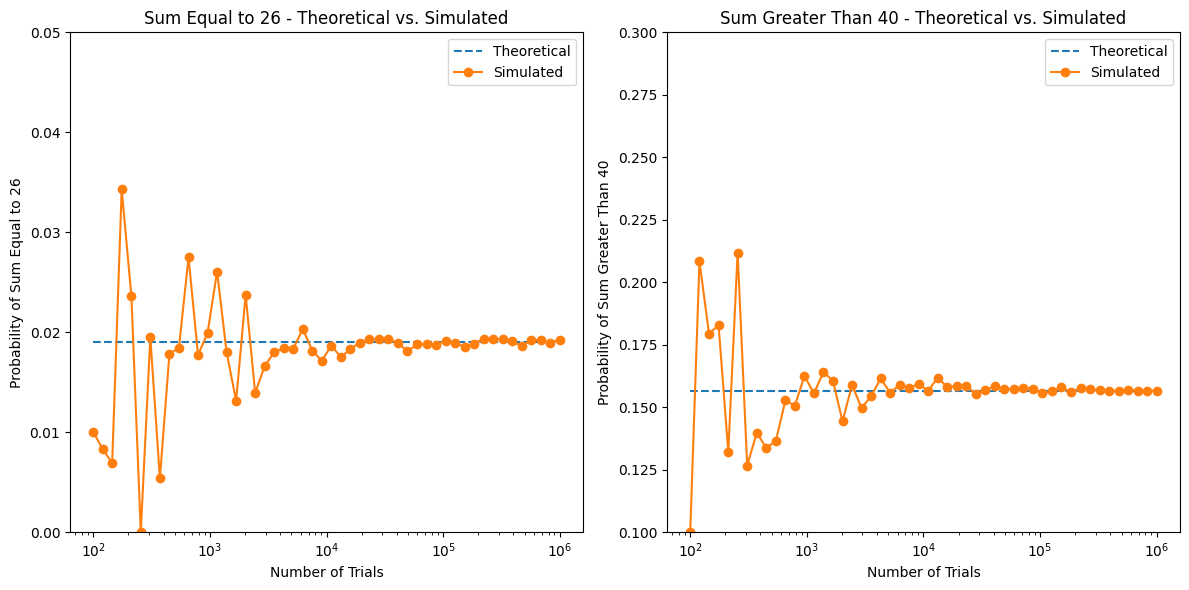

In [7]:
num_trials_list = np.logspace(2, 6, num=50, dtype=int)
simulated_prob_equal_26 = []
simulated_prob_greater_40 = []

for num_trials in num_trials_list:
    sum_equal_26, sum_greater_40 = simulate_die_throws(num_trials)
    simulated_prob_equal_26.append(sum_equal_26 / num_trials)
    simulated_prob_greater_40.append(sum_greater_40 / num_trials)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_trials_list, [prob_sum_equal_26] * len(num_trials_list), label="Theoretical", linestyle="--")
plt.plot(num_trials_list, simulated_prob_equal_26, label="Simulated", marker='o')
plt.ylim(0, 0.05)
plt.xscale('log')
plt.xlabel("Number of Trials")
plt.ylabel("Probability of Sum Equal to 26")
plt.title("Sum Equal to 26 - Theoretical vs. Simulated")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_trials_list, [prob_sum_greater_40] * len(num_trials_list), label="Theoretical", linestyle="--")
plt.plot(num_trials_list, simulated_prob_greater_40, label="Simulated", marker='o')
plt.ylim(0.10, 0.30)
plt.xscale('log')
plt.xlabel("Number of Trials")
plt.ylabel("Probability of Sum Greater Than 40")
plt.title("Sum Greater Than 40 - Theoretical vs. Simulated")
plt.legend()

plt.tight_layout()
plt.show()

This code compares theoretical and simulated probabilities for two dice-throwing outcomes: the sum of 10 dice equaling 26, and the sum being greater than 40. For each number of trials, it simulates the probabilities using the simulate_die_throws function and plots the results on logarithmic scales to observe the convergence of simulated probabilities to their theoretical counterparts as the number of trials increases. Each plot shows how the simulated probabilities stabilize near the theoretical values as the number of trials grows.

# **Q3**

**Consider the random experiment: Throwing a coin until 4 heads appear. Find the probability of the following events by**

*   (a) Simulating the random experiment 10000 times and
*   (b) using theory of probability with proper assumptions.
1.   The number of tosses to get 4 heads is 12 and
2.   the number of tossesto get 4 heads is at least 8.

**Simulation Approach**

In [8]:
def simulate_coin_tosses(num_trials):
    tosses_to_get_4_heads = []
    for _ in range(num_trials):
        count_heads = 0
        toss_count = 0
        while count_heads < 4:
            if random.randint(0, 1) == 1:
                count_heads += 1
            toss_count += 1

        tosses_to_get_4_heads.append(toss_count)
    return tosses_to_get_4_heads
num_trials = 10000
tosses_to_get_4_heads = simulate_coin_tosses(num_trials)
prob_12_tosses = sum(1 for x in tosses_to_get_4_heads if x == 12) / num_trials
prob_at_least_8_tosses = sum(1 for x in tosses_to_get_4_heads if x >= 8) / num_trials
print("Simulation Results:")
print(f"Probability of getting 4 heads in exactly 12 tosses: {prob_12_tosses:.4f}")
print(f"Probability of getting 4 heads in at least 8 tosses: {prob_at_least_8_tosses:.4f}")

Simulation Results:
Probability of getting 4 heads in exactly 12 tosses: 0.0404
Probability of getting 4 heads in at least 8 tosses: 0.4954


This function simulates multiple trials of coin tosses, aiming to count how many tosses are needed to get exactly 4 heads. For each trial, it records the number of tosses required to achieve 4 heads, then calculates and prints two probabilities:

1. **Probability of getting exactly 4 heads in 12 tosses**.
2. **Probability of needing at least 8 tosses to get 4 heads**.

The results are derived by counting the relevant outcomes from the simulated trials and dividing by the total number of trials.

**Theoretical Approach**

In [9]:
def theoretical_probability(num_tosses, k=4, p=0.5):
    if num_tosses < k:
        return 0
    return comb(num_tosses - 1, k - 1) * (p ** k) * ((1 - p) ** (num_tosses - k))

def cumulative_probability_complement():
    cumulative_prob_less_than_8 = sum(theoretical_probability(n) for n in range(4, 8))
    return 1 - cumulative_prob_less_than_8

theoretical_prob_12_tosses = theoretical_probability(12)
theoretical_prob_at_least_8_tosses = cumulative_probability_complement()

print("Theoretical Results:")
print(f"Theoretical Probability of getting 4 heads in exactly 12 tosses: {theoretical_prob_12_tosses:.4f}")
print(f"Theoretical Probability of getting 4 heads in at least 8 tosses: {theoretical_prob_at_least_8_tosses:.4f}")

Theoretical Results:
Theoretical Probability of getting 4 heads in exactly 12 tosses: 0.0403
Theoretical Probability of getting 4 heads in at least 8 tosses: 0.5000


This code calculates the **theoretical probabilities** for two events when tossing a coin to get exactly 4 heads:

1. **Theoretical probability of getting 4 heads in exactly 12 tosses**: Using the binomial formula and combinatorics, it calculates this probability with the `theoretical_probability` function.

2. **Theoretical probability of needing at least 8 tosses to get 4 heads**: This is computed by first summing the probabilities of needing fewer than 8 tosses (cumulative probability) and subtracting from 1, using `cumulative_probability_complement`.

**Proving Statistical Singularity with the help of plt**

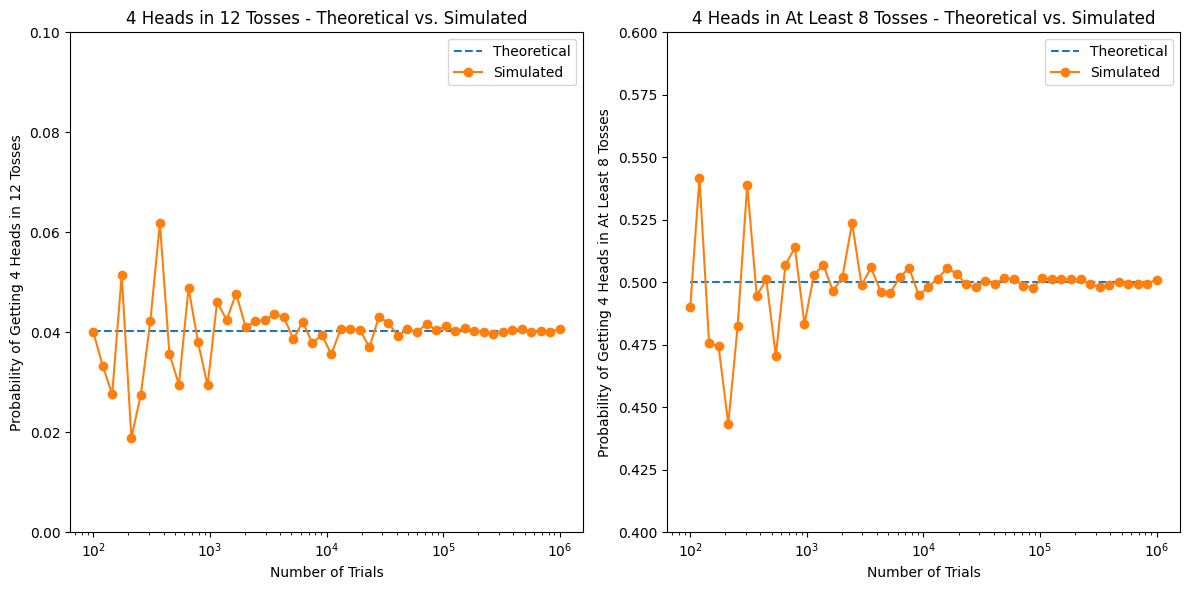

In [10]:
num_trials_list = np.logspace(2, 6, num=50, dtype=int)
simulated_prob_12_tosses = []
simulated_prob_at_least_8_tosses = []

for num_trials in num_trials_list:
    tosses_to_get_4_heads = simulate_coin_tosses(num_trials)
    prob_12_tosses = sum(1 for x in tosses_to_get_4_heads if x == 12) / num_trials
    prob_at_least_8_tosses = sum(1 for x in tosses_to_get_4_heads if x >= 8) / num_trials

    simulated_prob_12_tosses.append(prob_12_tosses)
    simulated_prob_at_least_8_tosses.append(prob_at_least_8_tosses)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_trials_list, [theoretical_prob_12_tosses] * len(num_trials_list), label="Theoretical", linestyle="--")
plt.plot(num_trials_list, simulated_prob_12_tosses, label="Simulated", marker='o')
plt.ylim(0, 0.1)
plt.xscale('log')
plt.xlabel("Number of Trials")
plt.ylabel("Probability of Getting 4 Heads in 12 Tosses")
plt.title("4 Heads in 12 Tosses - Theoretical vs. Simulated")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_trials_list, [theoretical_prob_at_least_8_tosses] * len(num_trials_list), label="Theoretical", linestyle="--")
plt.plot(num_trials_list, simulated_prob_at_least_8_tosses, label="Simulated", marker='o')
plt.ylim(0.4, 0.6)
plt.xscale('log')
plt.xlabel("Number of Trials")
plt.ylabel("Probability of Getting 4 Heads in At Least 8 Tosses")
plt.title("4 Heads in At Least 8 Tosses - Theoretical vs. Simulated")
plt.legend()

plt.tight_layout()
plt.show()

This code simulates coin tosses to compare the theoretical and simulated probabilities of getting exactly 4 heads in 12 tosses and at least 4 heads in at least 8 tosses. It visualizes the results in two subplots, demonstrating how the simulated probabilities converge to their theoretical counterparts as the number of trials increases. This convergence illustrates statistical singularity, reinforcing the consistency and reliability of the results across larger sample sizes.

# **Q4**

4. Consider the random experiment: In a bag there are 20 black balls and 30 white balls. A sample of 8 balls are drawn from the bag at random one by one without replacement and the number white balls are counted. Find the probability of the following events by
*   (a) Simulating the random experiment 10000 times and
*   (b) using theory of probability with proper assumptions.


1.   The number of white balls in the sample is 5 and
2.   the number of white balls in the sample is more than 6.


**Simulation Approach**

In [11]:
total_black_balls = 20
total_white_balls = 30
total_balls = total_black_balls + total_white_balls
sample_size = 8
def simulate_ball_draws(num_trials):
    count_5_white = 0
    count_more_than_6_white = 0
    for _ in range(num_trials):
        bag = ['W'] * total_white_balls + ['B'] * total_black_balls
        random.shuffle(bag)

        drawn_balls = bag[:sample_size]
        count_white = drawn_balls.count('W')

        if count_white == 5:
            count_5_white += 1
        if count_white > 6:
            count_more_than_6_white += 1

    return count_5_white, count_more_than_6_white

num_simulations = 10000
sum_5_white, sum_more_than_6_white = simulate_ball_draws(num_simulations)

prob_5_white = sum_5_white / num_simulations
prob_more_than_6_white = sum_more_than_6_white / num_simulations
print("Simulation Results:")
print(f"Probability of getting exactly 5 white balls: {prob_5_white:.4f}")
print(f"Probability of getting more than 6 white balls: {prob_more_than_6_white:.4f}")

Simulation Results:
Probability of getting exactly 5 white balls: 0.2984
Probability of getting more than 6 white balls: 0.0873


This code implements a Monte Carlo simulation to estimate the probabilities of drawing exactly 5 white balls and more than 6 white balls from a population of 20 black and 30 white balls. By conducting 10,000 trials, it computes empirical probabilities for these outcomes, providing insights into the distribution of discrete random variables in a hypergeometric sampling context.

**Theoretical Approach**

In [12]:
def hypergeometric_probability(k, n, N, K):
    return (comb(K, k) * comb(N - K, n - k)) / comb(N, n)

theoretical_prob_5_white = hypergeometric_probability(5, sample_size, total_balls, total_white_balls)

theoretical_prob_more_than_6_white = (
    hypergeometric_probability(7, sample_size, total_balls, total_white_balls) +
    hypergeometric_probability(8, sample_size, total_balls, total_white_balls)
)
print("Theoretical Results:")
print(f"Theoretical Probability of getting exactly 5 white balls: {theoretical_prob_5_white:.4f}")
print(f"Theoretical Probability of getting more than 6 white balls: {theoretical_prob_more_than_6_white:.4f}")

Theoretical Results:
Theoretical Probability of getting exactly 5 white balls: 0.3026
Theoretical Probability of getting more than 6 white balls: 0.0867



This code calculates the theoretical probabilities of drawing balls using the hypergeometric distribution. It determines the probability of drawing exactly 5 white balls and the probability of drawing more than 6 white balls from a total of 50 balls (20 black and 30 white), utilizing combinations to compute the outcomes. The results offer a mathematical benchmark for comparison with the empirical probabilities obtained from the simulation.

**Proving Statistical Singularity with the help of plt**

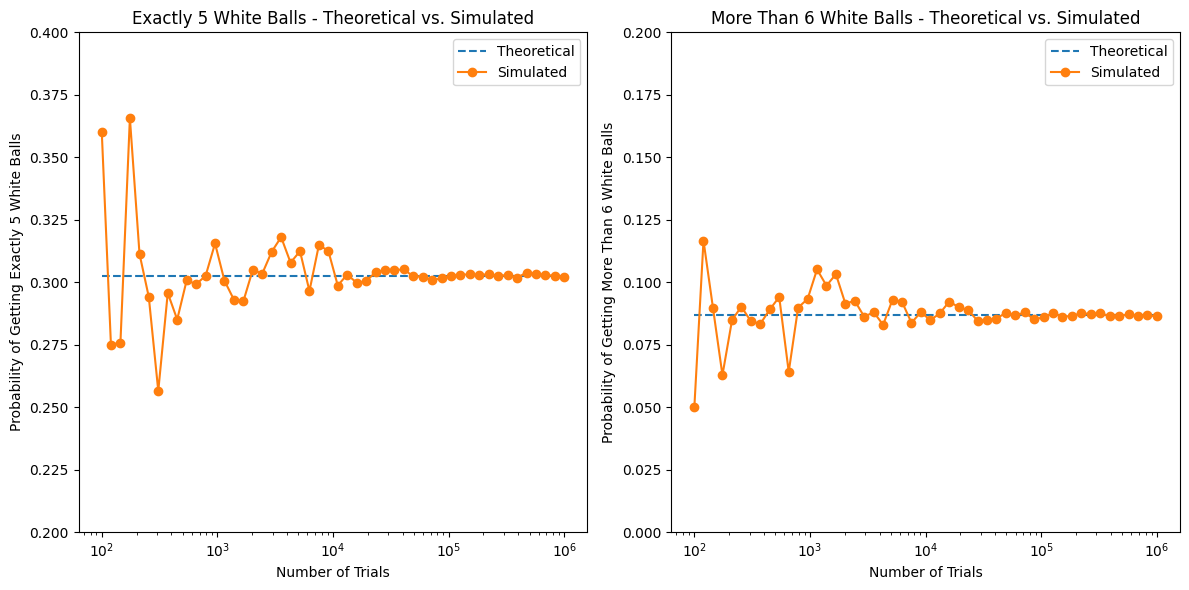

In [13]:
num_trials_list = np.logspace(2, 6, num=50, dtype=int)
simulated_prob_5_white = []
simulated_prob_more_than_6_white = []

for num_trials in num_trials_list:
    sum_5_white, sum_more_than_6_white = simulate_ball_draws(num_trials)

    prob_5_white = sum_5_white / num_trials
    prob_more_than_6_white = sum_more_than_6_white / num_trials

    simulated_prob_5_white.append(prob_5_white)
    simulated_prob_more_than_6_white.append(prob_more_than_6_white)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(num_trials_list, [theoretical_prob_5_white] * len(num_trials_list), label="Theoretical", linestyle="--")
plt.plot(num_trials_list, simulated_prob_5_white, label="Simulated", marker='o')
plt.ylim(0.2, 0.4)
plt.xscale('log')
plt.xlabel("Number of Trials")
plt.ylabel("Probability of Getting Exactly 5 White Balls")
plt.title("Exactly 5 White Balls - Theoretical vs. Simulated")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_trials_list, [theoretical_prob_more_than_6_white] * len(num_trials_list), label="Theoretical", linestyle="--")
plt.plot(num_trials_list, simulated_prob_more_than_6_white, label="Simulated", marker='o')
plt.ylim(0, 0.2)
plt.xscale('log')
plt.xlabel("Number of Trials")
plt.ylabel("Probability of Getting More Than 6 White Balls")
plt.title("More Than 6 White Balls - Theoretical vs. Simulated")
plt.legend()

plt.tight_layout()
plt.show()

This code visualizes the comparison of theoretical and simulated probabilities for drawing exactly 5 white balls and more than 6 white balls from a mixed population. It utilizes Monte Carlo simulation across a logarithmic range of trials to estimate probabilities. The results illustrate the convergence of empirical estimates to theoretical values, emphasizing the robustness of the hypergeometric distribution in discrete probability scenarios.